## TODO / Questions

- Run multiple times (5? 10?)
- More metrics
- Which models? MWEM, PrivBayes, MST, AMT, ???
- Parrallelism (which compute system?)
- Which datasets?

In [ ]:
from tqdm import tqdm

from ydnpd import load_dataset, HyperParamSearchTask, PrivacyUtilityTradeoffTask, suppress_output, HPARAMS_BASE

import os
os.environ["PRIVBAYES_BIN"] = "./ydnpd/synthesis/privbayes"

## Parameters

In [2]:
DATASET_NAMES = ["national", "massachusetts", "baseline_domain", "baseline_univariate"]

DATASETS = {name: load_dataset(name) for name in DATASET_NAMES}

EXPERIMENT_SYNTHESIZERS  = ["privbayes", "mwem"] #["aim"]  # ["mwem", , "aim"]  # "privbayes", 

FIXED_PREPROCESSOR_EPSILON = 10_000

HPARAMS_DIMS = {
    "mwem": {
        "preprocessor_eps": [FIXED_PREPROCESSOR_EPSILON],
        "q_count": [100, 1000],
        "marginal_width": [2, 3],
        "iterations": [10, 20],
        "add_ranges": [False, True]
        }, 
    "mst": {
        "preprocessor_eps": [FIXED_PREPROCESSOR_EPSILON],
    },
    "aim": {
        "preprocessor_eps": [FIXED_PREPROCESSOR_EPSILON],
        "degree": [2, 3],
        "rounds": [10, 100]
    },
    "privbayes": {
        "theta": HPARAMS_BASE["PBN_BASED"]["THETA"],
        "epsilon_split": HPARAMS_BASE["PBN_BASED"]["EPSILON_SPLIT"],
    }
}

EPSILONS = [1, 4, 10, 20]
                   # dev           # test
EXPERIMENTS = [("massachusetts",   "national"),
               ("baseline_domain", "national")]

## Execute Tasks

In [3]:
hparam_tasks_results = {}

for synth_name in tqdm(EXPERIMENT_SYNTHESIZERS):

    task = HyperParamSearchTask(epsilons=EPSILONS,
                                synth_name=synth_name,
                                hparam_dims=HPARAMS_DIMS[synth_name])
    results = {}

    for dataset_name, (dataset, schema) in tqdm(DATASETS.items()):

        with suppress_output():
            results[dataset_name] = task.execute(dataset, schema)

    hparam_tasks_results[synth_name] = (task, results)

 50%|█████     | 1/2 [10:58<10:58, 658.07s/it]

Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5]
Columns: 6
Dimensionality: 38,880
Cuboids possible: 63
1-2-way cuboids possible: 21
Fitting for 10 iterations
Number of queries: 100
Number of slices in queries: 3619
Per-Measure Epsilon: 0.050
Measurement Error: 46.05

[0] - Average error: 27.792. Selected 3 slices
[1] - Average error: 21.715. Selected 6 slices
[2] - Average error: 15.448. Selected 9 slices
[3] - Average error: 9.082. Selected 12 slices
[4] - Average error: 5.822. Selected 12 slices
[5] - Average error: 4.521. Selected 18 slices
[6] - Average error: 3.892. Selected 2 slices
[7] - Average error: 2.981. Selected 10 slices
[8] - Average error: 2.432. Selected 18 slices
[9] - Average error: 2.166. Selected 12 slices
Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5]
Columns: 6
Dimensionality: 38,880
Cuboids possible: 63
1-2-way cuboids possible: 21
Fitting for 10 iterations
Number of queries: 100
Number of slices in queries: 816
Per-Measure Epsilon: 0.050


Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5]
Columns: 6
Dimensionality: 34,560
Cuboids possible: 63
1-2-way cuboids possible: 21
Fitting for 10 iterations
Number of queries: 100
Number of slices in queries: 3323
Per-Measure Epsilon: 0.050
Measurement Error: 46.05

[0] - Average error: 10.801. Selected 3 slices
[1] - Average error: 7.551. Selected 8 slices
[2] - Average error: 4.724. Selected 6 slices
[3] - Average error: 2.749. Selected 12 slices
[4] - Average error: 1.813. Selected 2 slices
[5] - Average error: 1.158. Selected 20 slices
[6] - Average error: 0.933. Selected 30 slices
[7] - Average error: 0.755. Selected 18 slices
[8] - Average error: 0.663. Selected 24 slices
[9] - Average error: 0.556. Selected 16 slices
Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5]
Columns: 6
Dimensionality: 34,560
Cuboids possible: 63
1-2-way cuboids possible: 21
Fitting for 10 iterations
Number of queries: 100
Number of slices in queries: 782
Per-Measure Epsilon: 0.050
Me

Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5]
Columns: 6
Dimensionality: 38,880
Cuboids possible: 63
1-2-way cuboids possible: 21
Fitting for 10 iterations
Number of queries: 100
Number of slices in queries: 3529
Per-Measure Epsilon: 0.050
Measurement Error: 46.05

[0] - Average error: 0.706. Selected 3 slices
[1] - Average error: 0.571. Selected 24 slices
[2] - Average error: 0.551. Selected 9 slices
[3] - Average error: 0.485. Selected 18 slices
[4] - Average error: 0.476. Selected 12 slices
[5] - Average error: 0.478. Selected 108 slices
[6] - Average error: 0.480. Selected 72 slices
[7] - Average error: 0.464. Selected 20 slices
[8] - Average error: 0.448. Selected 6 slices
[9] - Average error: 0.428. Selected 10 slices
Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5]
Columns: 6
Dimensionality: 38,880
Cuboids possible: 63
1-2-way cuboids possible: 21
Fitting for 10 iterations
Number of queries: 100
Number of slices in queries: 816
Per-Measure Epsilon: 0.050
M

Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5]
Columns: 6
Dimensionality: 34,560
Cuboids possible: 63
1-2-way cuboids possible: 21
Fitting for 10 iterations
Number of queries: 100
Number of slices in queries: 3390
Per-Measure Epsilon: 0.050
Measurement Error: 46.05

[0] - Average error: 23.171. Selected 3 slices
[1] - Average error: 17.838. Selected 6 slices
[2] - Average error: 12.182. Selected 8 slices
[3] - Average error: 5.853. Selected 12 slices
[4] - Average error: 3.386. Selected 12 slices
[5] - Average error: 2.273. Selected 10 slices
[6] - Average error: 1.444. Selected 2 slices
[7] - Average error: 0.691. Selected 48 slices
[8] - Average error: 0.599. Selected 30 slices
[9] - Average error: 0.541. Selected 20 slices
Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5]
Columns: 6
Dimensionality: 34,560
Cuboids possible: 63
1-2-way cuboids possible: 21
Fitting for 10 iterations
Number of queries: 100
Number of slices in queries: 782
Per-Measure Epsilon: 0.050


100%|██████████| 2/2 [1:29:11<00:00, 2675.67s/it]


## Task: Hyperparameter Search

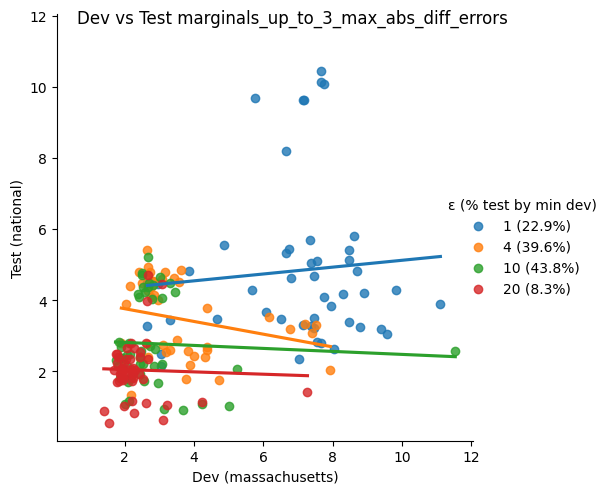

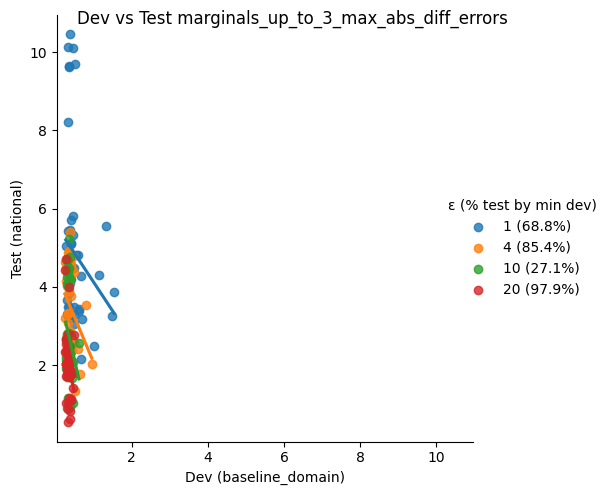

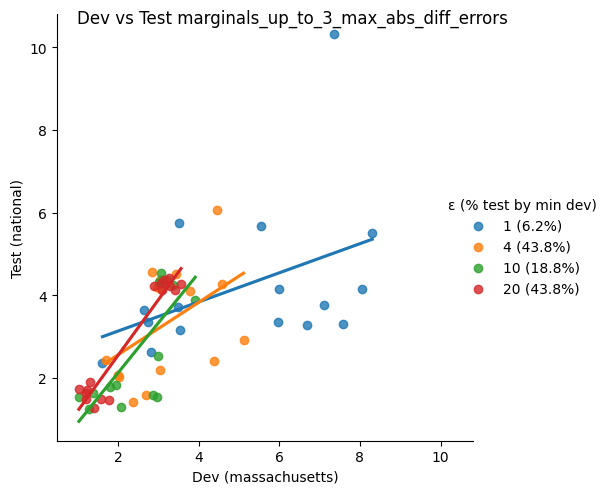

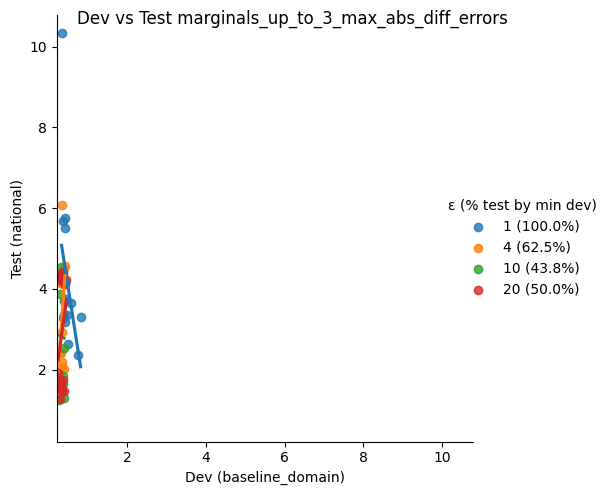

In [4]:
for synth_name, (hparam_task, hparam_results) in hparam_tasks_results.items():
    for dev_name, test_name in EXPERIMENTS:
        hparam_task.plot(hparam_results,
                         dev_name=dev_name,
                         test_name=test_name)

## Task: Privacy-Utility Trade-off

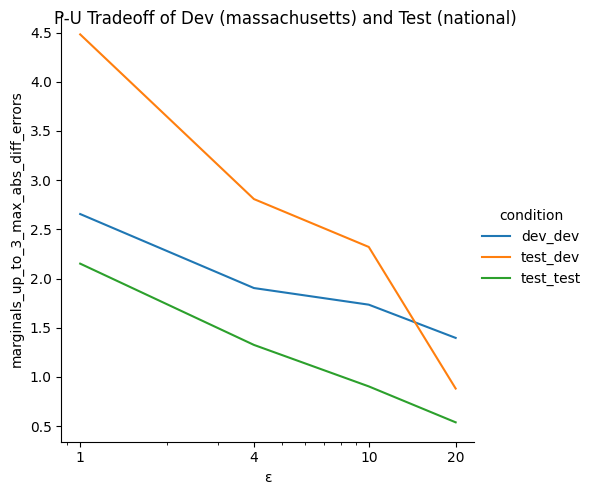

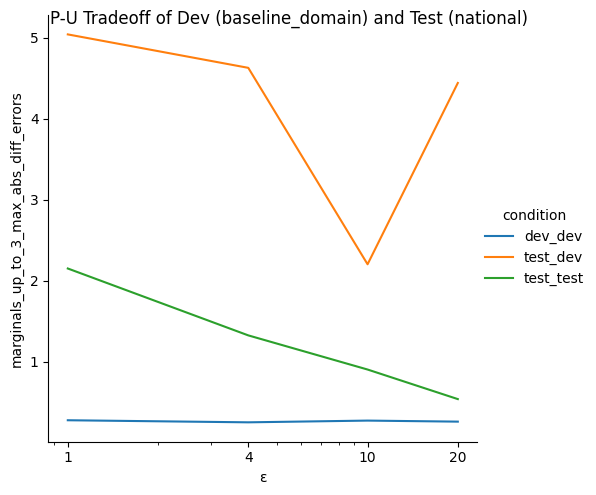

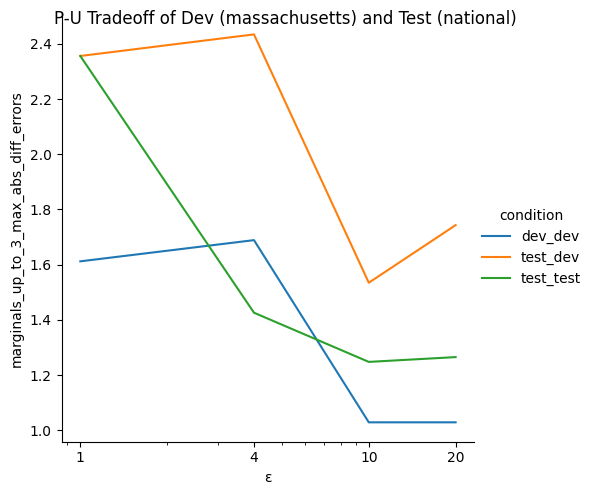

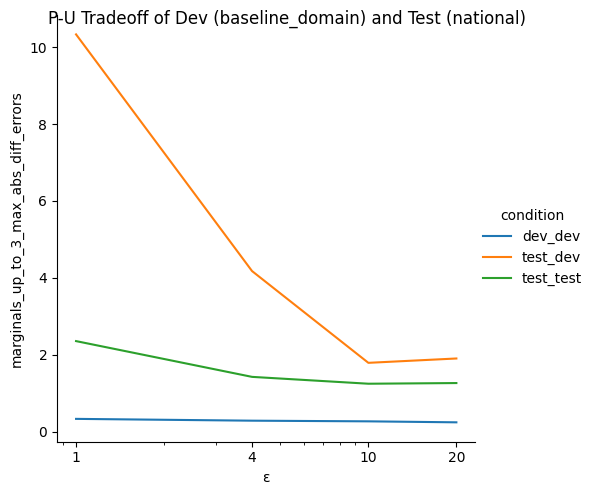

In [5]:
for synth_name, (hparam_task, hparam_results) in hparam_tasks_results.items():

    tradeoff_task = PrivacyUtilityTradeoffTask(hparam_task)
    
    for dev_name, test_name in EXPERIMENTS:

        tradeoff_task.plot(hparam_results,
                           dev_name=dev_name,
                           test_name=test_name)
